In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
recaudacion = pd.read_csv('recaudacion.csv')
recaudacion.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Recaudación impositiva (% del PIB),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,Recaudación impositiva (% del PIB),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.916794,7.707801,7.122773,6.882103,7.585382,8.842616,9.250468,NaN,NaN,NaN
2,Angola,AGO,Recaudación impositiva (% del PIB),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.103413,14.822719,14.184763,13.542630,11.002019,9.732512,9.223777,NaN,NaN,NaN
3,Albania,ALB,Recaudación impositiva (% del PIB),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.022012,17.483234,16.503275,18.301941,18.515796,17.590228,18.879744,18.61218,NaN,NaN
4,Andorra,AND,Recaudación impositiva (% del PIB),GC.TAX.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Recaudación impositiva de los paises expresada como porcetaje de su Producto Bruto Interno.

In [3]:
carga = pd.read_csv('tasa_tributaria_total.csv')
carga.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Tasa tributaria total (% de utilidades comerci...,IC.TAX.TOTL.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,Tasa tributaria total (% de utilidades comerci...,IC.TAX.TOTL.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35.8,35.8,35.6,36.1,36.1,47.9,71.4,71.4,71.4,NaN
2,Angola,AGO,Tasa tributaria total (% de utilidades comerci...,IC.TAX.TOTL.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,52.3,52.3,52.6,52.6,49.0,48.0,49.1,49.1,49.1,NaN
3,Albania,ALB,Tasa tributaria total (% de utilidades comerci...,IC.TAX.TOTL.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.7,38.8,31.7,31.6,36.9,36.9,37.3,37.3,36.6,NaN
4,Andorra,AND,Tasa tributaria total (% de utilidades comerci...,IC.TAX.TOTL.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tasa tributaria total, representando la carga impositiva que enfrentan las empresas como un porcentaje de sus utilidades comerciales.

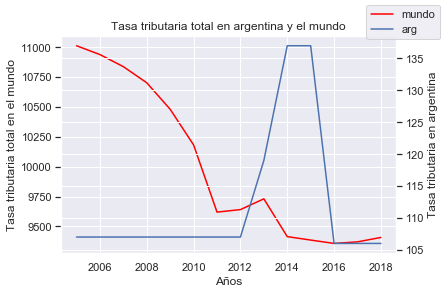

In [4]:
carga_mundial = pd.DataFrame(index=range(2005,2019),dtype='float64')
carga_mundial['mundo'] = 0
carga_mundial['arg'] = 0

for index,row in carga.iterrows():    
    for anio in range(2005,2019):
        previous = carga_mundial.at[anio, 'mundo']
        if not np.isnan(row[str(anio)]):
            carga_mundial.at[anio, 'mundo'] = previous + row[str(anio)]

            if row['Country Code'] == 'ARG':
                carga_mundial.at[anio, 'arg'] = row[str(anio)]
        
fig, ax1 = plt.subplots()
ax1.set_title('Tasa tributaria total en argentina y el mundo')
ax1.plot(carga_mundial.mundo,c='red',label='mundo')
ax1.set_ylabel('Tasa tributaria total en el mundo')
ax1.set_xlabel('Años')
ax2 = ax1.twinx() 
ax2.plot(carga_mundial.arg, label='arg')
ax2.set_ylabel('Tasa tributaria en argentina')
fig.legend()

En el mundo, la carga impositiva se viene reduciendo. En Argentina, se mantiene por encima del 100%

Text(0, 0.5, 'Tasa tributaria total (% utilidades)')

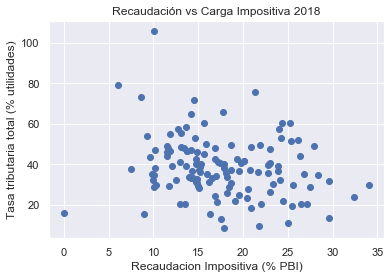

In [5]:
fig,ax=plt.subplots()
plt.scatter(recaudacion['2018'], carga['2018'])
ax.set_title('Recaudación vs Carga Impositiva 2018')
ax.set_xlabel('Recaudacion Impositiva (% PBI)')
ax.set_ylabel('Tasa tributaria total (% utilidades)')

En 2018, vemos a Argentina como único pais con una tasa tributaria por encima del 100%, recaudando menos del 10% del PBI. Los paises con niveles de impuestos menores al 60% recaudan en su mayoría entre el 10% y el 35% del PBI.

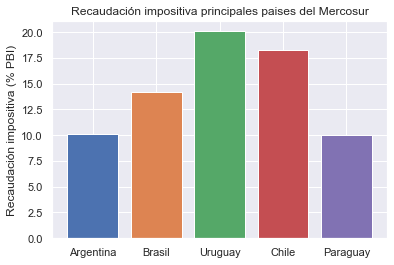

In [6]:
countries = ['Argentina', 'Brasil', 'Uruguay', 'Chile', 'Paraguay']

fig,ax = plt.subplots()
ax.set_title('Recaudación impositiva principales paises del Mercosur')
ax.set_ylabel('Recaudación impositiva (% PBI)')
for country in countries:
    ax.bar(country, recaudacion[recaudacion['Country Name'] == country]['2018'])

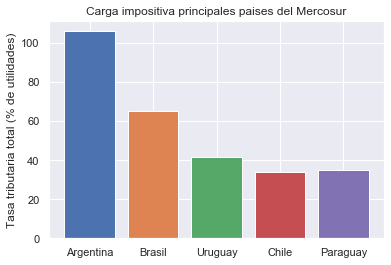

In [7]:
fig,ax = plt.subplots()
ax.set_title('Carga impositiva principales paises del Mercosur')
ax.set_ylabel('Tasa tributaria total (% de utilidades)')

for country in countries:
    plt.bar(country, carga[carga['Country Name'] == country]['2018'])

Argentina junto con Paraguay son los paises con menor recaudación de impuestos dentro de los principales estados del Mercosur. 

Por otro lado, Uruguay tiene la mayor recaudación de la región con una de las menores cargas impositivas. 

Paraguay también tiene una carga impositiva menor al 40% lo cual indicaría que una alta recaudación de impuestos por parte del estado no es únicamente consecuencia de una baja carga impositiva, pero sí una condición necesaria.

Fuentes:
- https://datos.bancomundial.org/indicator/IC.TAX.TOTL.CP.ZS
- https://datos.bancomundial.org/indicador/GC.TAX.TOTL.GD.ZS